<a href="https://colab.research.google.com/github/Vedang1510/NeuroScanAI/blob/main/brain_tumer_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries to import

In [2]:
import numpy as np  # linear algebra
import pandas as pd # data processing csv file I/O

import os
for dirname, _, filenames in os.walk('https://drive.google.com/drive/folders/18wl8rdFGmOrsWwOEI4qtS77qhSpn0a9g?usp=drive_link'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

import keras
from keras.models import Sequential # sequencial data
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout # hidden layers between I/O
# conv2D : create convolutional 2D neural network
# Flatten : convert 2D matrix into 1D array
# Dense : It is used for processing
# MaxPooling2D : works hand in hand with canv2D
# Dropout : Removes useless features

#inport Accuracy score
from sklearn.metrics import accuracy_score

import ipywidgets # required for classification
import io # input / output
import tqdm
from PIL import Image # PIL : Public Image Library

from sklearn.model_selection import train_test_split # for dividing tests
import cv2 # deals with images
from sklearn.utils import shuffle

import tensorflow as tf #to use all the above library properly

Folder paths


In [17]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('./drive/MyDrive/Colab_Notebooks/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('./drive/MyDrive/Colab_Notebooks/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3272, 150, 150, 3)

Training and tesiting spliting

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Creating convolutional neural network

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

checking the accuracy

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 25s 153ms/step - loss: 1.8352 - accuracy: 0.3111 - val_loss: 1.3666 - val_accuracy: 0.2169
Epoch 2/20
83/83 [==============================] - 8s 92ms/step - loss: 1.1071 - accuracy: 0.5187 - val_loss: 1.0772 - val_accuracy: 0.5288
Epoch 3/20
83/83 [==============================] - 8s 95ms/step - loss: 0.9150 - accuracy: 0.6014 - val_loss: 0.9277 - val_accuracy: 0.6000
Epoch 4/20
83/83 [==============================] - 8s 93ms/step - loss: 0.8169 - accuracy: 0.6467 - val_loss: 0.9650 - val_accuracy: 0.6136
Epoch 5/20
83/83 [==============================] - 8s 96ms/step - loss: 0.7202 - accuracy: 0.6912 - val_loss: 0.7516 - val_accuracy: 0.6847
Epoch 6/20
83/83 [==============================] - 8s 94ms/step - loss: 0.6628 - accuracy: 0.7305 - val_loss: 0.7896 - val_accuracy: 0.7085
Epoch 7/20
83/83 [==============================] - 8s 95ms/step - loss: 0.5577 - accuracy: 0.7724 - val_loss: 0.7383 - val_accuracy: 0.6847
Epoch 8/20


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Creating Graph of accuracy

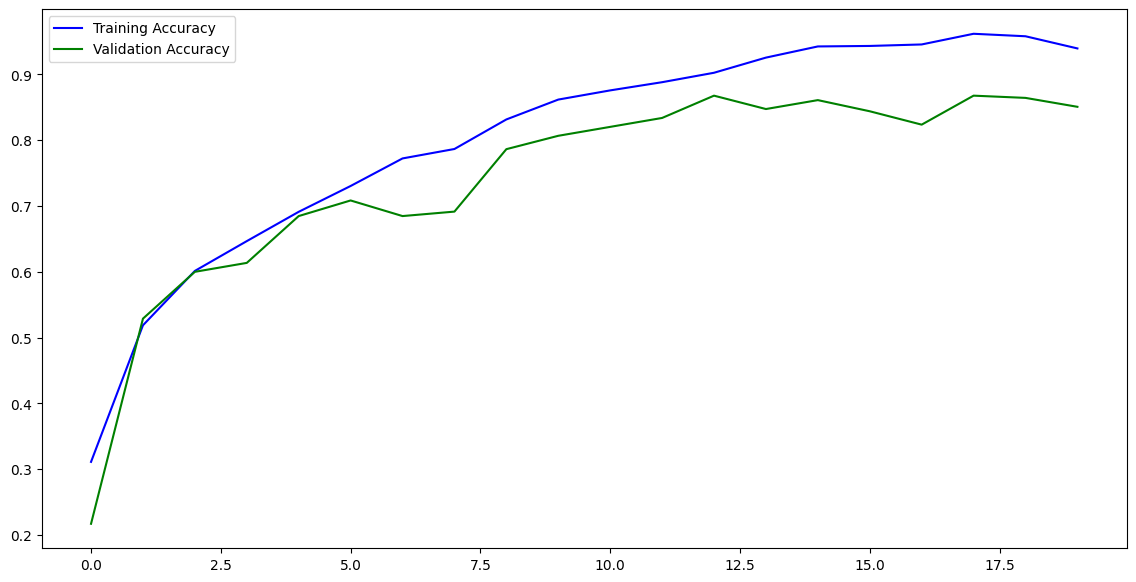

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'b',label="Training Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

creating graph of loss


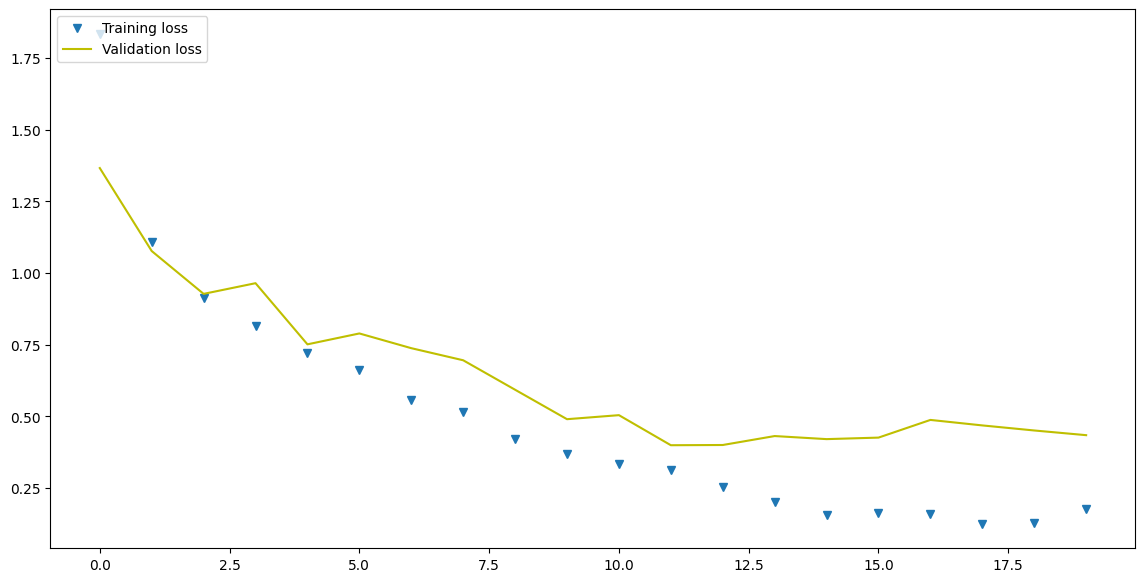

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'v',label="Training loss")
plt.plot(epochs,val_loss,'y',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [26]:
# Import necessary modules
import cv2
import numpy as np

# Load the image
img = cv2.imread('./drive/MyDrive/Colab_Notebooks/Training/meningioma_tumor/m (100).jpg')

# Check if the image is loaded successfully
if img is None:
    print("Error: Image not loaded")

# Resize the image
img = cv2.resize(img, (150, 150))

# Convert the image to a NumPy array
img_array = np.array(img)

# Print the shape of the image array
print(img_array.shape)

(150, 150, 3)


In [27]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

checking image tumor type


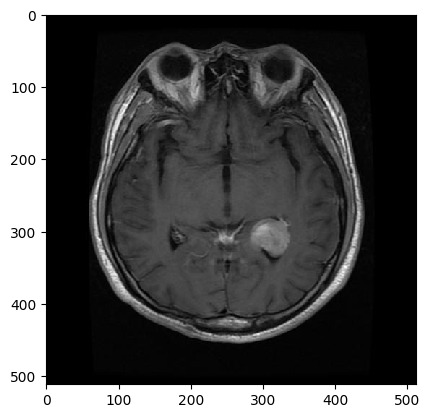

In [28]:
from tensorflow.keras.preprocessing import image
img = image.load_img('./drive/MyDrive/Colab_Notebooks/Training/meningioma_tumor/m (100).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [32]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 28ms/step


1